# Big Data Bandits

A Project-Group of the DHBW Karlsruhe participating in a AI-powerd World.

In [19]:
import pandas as pd

from analize import *

Posts:pd.DataFrame = pd.read_csv('./datasets/elonmusk.csv')
Tesla:pd.DataFrame = pd.read_csv('./datasets/tesla.csv')
Dogecoin:pd.DataFrame = pd.read_csv('./datasets/dogecoin.csv')

In [20]:
def get_influences(filter_list:list=[], hit:bool=False):
    influences:pd.DataFrame = pd.DataFrame(columns=['date', 'posts', 'count_posts', 'trend'])
    j = 0
    old_date = None

    for i, Post in Posts.iterrows():
        if not check_filter(str(Post['text']), filter_list, hit=hit):
            continue
        else:
            #Convert Datetime-string, to Date-object
            date = datetime.datetime.strptime(str(Post['datetime'])[0:18], '%Y-%m-%d %H:%M:%S').date()

            ret = get_trend(date, Dogecoin)
            if ret == None:
                continue
            
            else:
                trend, avgs, dates, model = ret

                if date != old_date:
                    influences.loc[j] = [date] + [[Post['text']]] + [0] + [trend]
                    old_date = date
                    old_j = j
                    j += 1
                else:
                    influences.loc[j-1, 'posts'].append(Post['text'])
                    influences.loc[j-1, 'count_posts'] += 1
    return [influences, j/i*100]


In [30]:
influences1, part1 = get_influences(["dodgecoin", "Dodgecoin", "dodge", "coin"], False)
influences2, part2 = get_influences(["dodgecoin", "Dodgecoin", "dodge", "coin"], True)
influences3, part3 = get_influences([], False)

([<matplotlib.patches.Wedge at 0x62d281d0>,
 [Text(-1.0890867630328989, 0.1545639757075448, ''),
  Text(1.0890867539883196, -0.15456403943733313, '')])

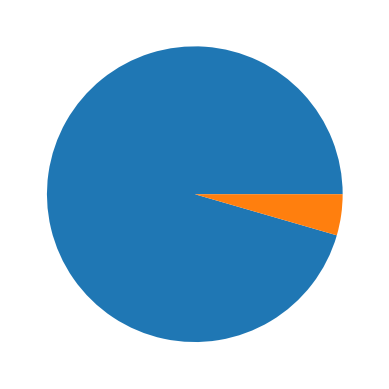

In [31]:
import matplotlib.pyplot as plt
plt.pie([part1, part2])

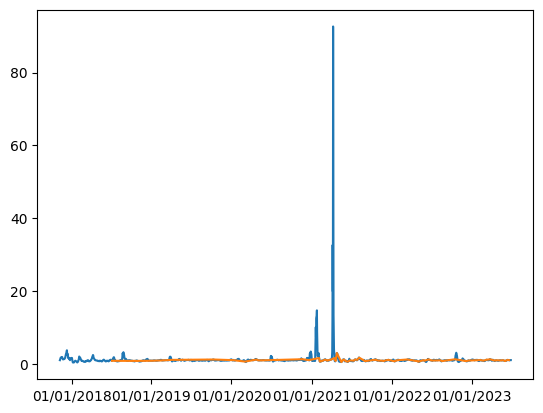

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))

plt.plot(influences1['date'], influences1['trend'])
plt.plot(influences2['date'], influences2['trend'])